## AI Project UCS415 
#### Finding Popularity of Spotify Songs 
Nitansh Jain  102017025

``` Importing Pandas and Numpy ``` 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn

Converting data from the csv file to a dataframe

In [70]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [71]:
# checking if any null or nan values are present
print(spotify_df.isna().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [72]:
# checking data types of all columns
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [73]:
spotify_df.drop_duplicates(subset='title',inplace=True)

In [74]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [75]:
#  dropping adele song with bpm = 0
spotify_df.drop(spotify_df[(spotify_df['bpm'] == 0) & spotify_df['artist']=='Adele'].index, inplace=True)

In [76]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0' ,'year'], axis=1, inplace=True)
spotify_df.head()


,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78


In [77]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.137185,-0.136349,0.185522,0.082483,0.022663,-0.032077,-0.123870,0.082028,0.014150
nrgy,0.137185,1.000000,0.174750,0.540525,0.189642,0.416643,-0.137984,-0.554028,0.122138,-0.048663
dnce,-0.136349,0.174750,1.000000,0.239543,-0.021800,0.496222,-0.176851,-0.245016,-0.020391,0.116057
dB,0.185522,0.540525,0.239543,1.000000,0.082354,0.289727,-0.106793,-0.188642,0.009696,0.163918
live,0.082483,0.189642,-0.021800,0.082354,1.000000,0.028129,0.098406,-0.104033,0.136586,-0.075583
val,0.022663,0.416643,0.496222,0.289727,0.028129,1.000000,-0.262687,-0.251755,0.125371,0.043903
dur,-0.032077,-0.137984,-0.176851,-0.106793,0.098406,-0.262687,1.000000,0.083184,0.036501,-0.105631
acous,-0.123870,-0.554028,-0.245016,-0.188642,-0.104033,-0.251755,0.083184,1.000000,-0.016763,0.019870
spch,0.082028,0.122138,-0.020391,0.009696,0.136586,0.125371,0.036501,-0.016763,1.000000,-0.042592
popularity,0.014150,-0.048663,0.116057,0.163918,-0.075583,0.043903,-0.105631,0.019870,-0.042592,1.000000


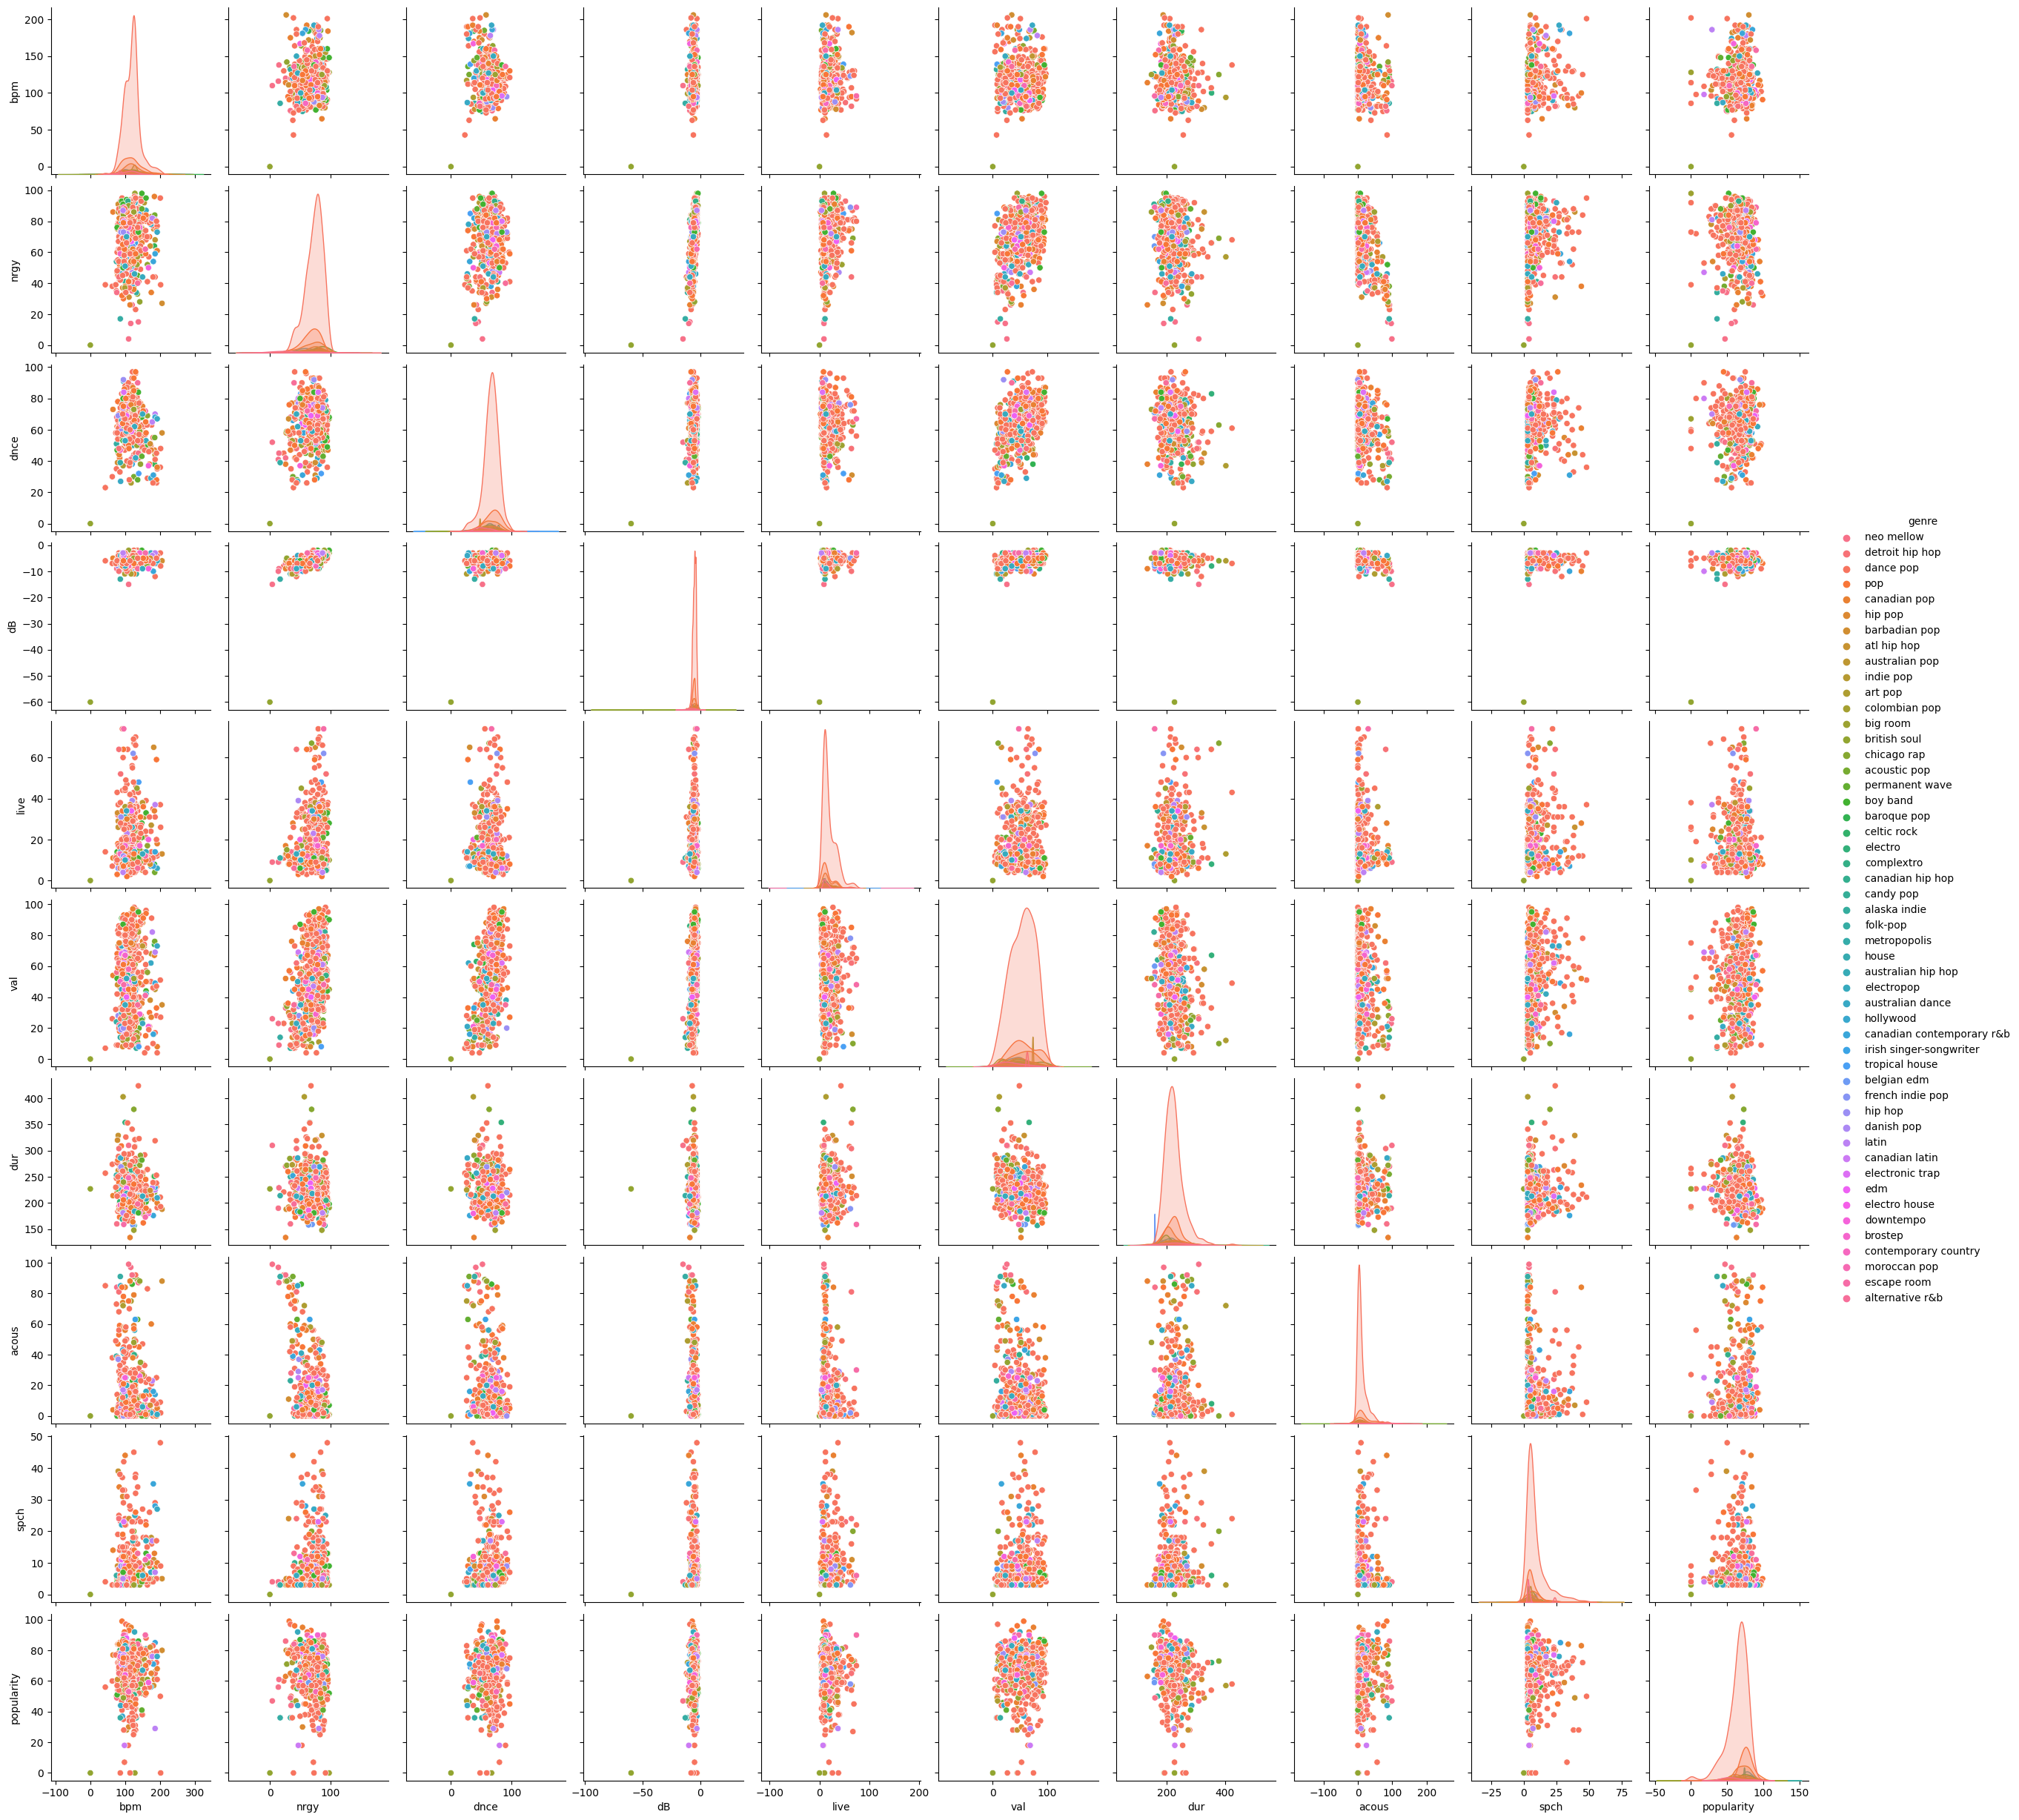

In [78]:
sns.pairplot(spotify_features, hue='genre')

<AxesSubplot:>

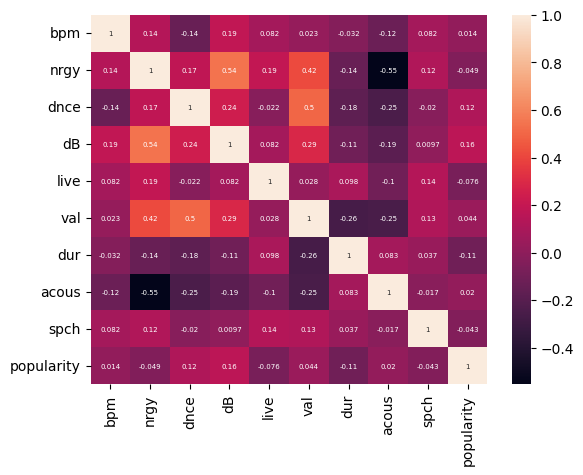

In [79]:
sns.heatmap(spotify_df.corr(), annot=True, annot_kws={"size": 5})

In [80]:
# checking correlation table
spotify_df.head()
spotify_df.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.137185,-0.136349,0.185522,0.082483,0.022663,-0.032077,-0.123870,0.082028,0.014150
nrgy,0.137185,1.000000,0.174750,0.540525,0.189642,0.416643,-0.137984,-0.554028,0.122138,-0.048663
dnce,-0.136349,0.174750,1.000000,0.239543,-0.021800,0.496222,-0.176851,-0.245016,-0.020391,0.116057
dB,0.185522,0.540525,0.239543,1.000000,0.082354,0.289727,-0.106793,-0.188642,0.009696,0.163918
live,0.082483,0.189642,-0.021800,0.082354,1.000000,0.028129,0.098406,-0.104033,0.136586,-0.075583
val,0.022663,0.416643,0.496222,0.289727,0.028129,1.000000,-0.262687,-0.251755,0.125371,0.043903
dur,-0.032077,-0.137984,-0.176851,-0.106793,0.098406,-0.262687,1.000000,0.083184,0.036501,-0.105631
acous,-0.123870,-0.554028,-0.245016,-0.188642,-0.104033,-0.251755,0.083184,1.000000,-0.016763,0.019870
spch,0.082028,0.122138,-0.020391,0.009696,0.136586,0.125371,0.036501,-0.016763,1.000000,-0.042592
popularity,0.014150,-0.048663,0.116057,0.163918,-0.075583,0.043903,-0.105631,0.019870,-0.042592,1.000000


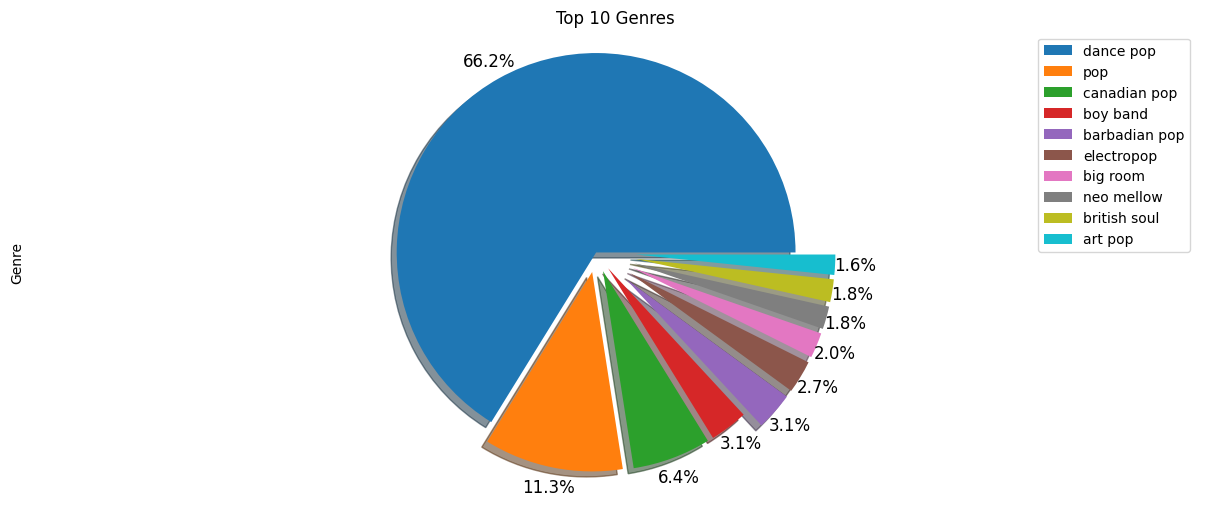

In [81]:
# creating a pie chart showing which genre ended up as a top song on average
explode_list = [0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
fig = spotify_df['genre'].value_counts().nlargest(10).plot(kind='pie',
                                        figsize=(15,6),
                                        autopct='%1.1f%%',
                                        shadow=True,
                                        labels=None,
                                        pctdistance=1.1,
                                        textprops={'fontsize': 12},
                                        explode=explode_list,
                                        )


plt.title('Top 10 Genres')
plt.ylabel('Genre')
plt.axis('equal')
# add legend
plt.legend(labels=spotify_df['genre'].value_counts().nlargest(10).index, loc='upper right') 
plt.show()

<AxesSubplot:xlabel='spch', ylabel='popularity'>

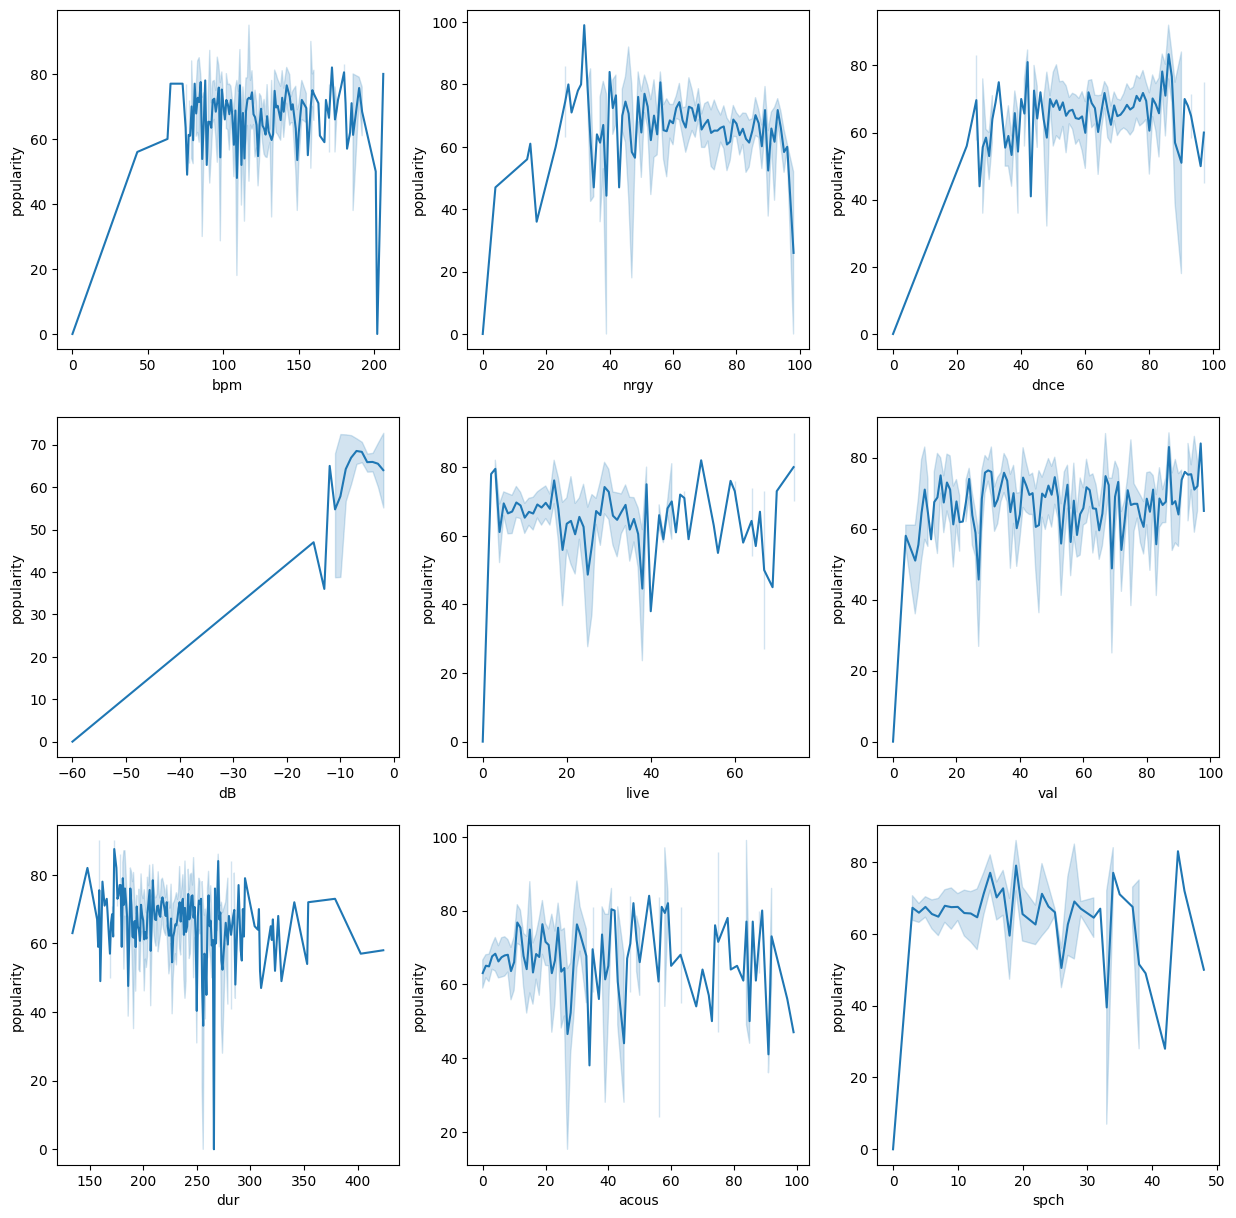

In [82]:
fig1, axes = plt.subplots(3, 3, figsize=(15,15))

# creating line plot showing bpm vs popularity
sns.lineplot(ax=axes[0, 0], x='bpm', y='popularity', data=spotify_df)

# creating line plot showing energy vs popularity
sns.lineplot(ax=axes[0, 1], x='nrgy', y='popularity', data=spotify_df)

# creating line plot showing danceability vs popularity
sns.lineplot(ax=axes[0, 2], x='dnce', y='popularity', data=spotify_df)

# creating line plot showing decibels vs popularity
sns.lineplot(ax=axes[1, 0], x='dB', y='popularity', data=spotify_df)

# creating line plot showing live vs popularity
sns.lineplot(ax=axes[1, 1], x='live', y='popularity', data=spotify_df)

# creating line plot showing val vs popularity
sns.lineplot(ax=axes[1, 2], x='val', y='popularity', data=spotify_df)

# creating line plot showing dur vs popularity
sns.lineplot(ax=axes[2, 0], x='dur', y='popularity', data=spotify_df)

# creating line plot showing acous vs popularity
sns.lineplot(ax=axes[2, 1], x='acous', y='popularity', data=spotify_df)

# creating line plot showing spch vs popularity
sns.lineplot(ax=axes[2, 2], x='spch', y='popularity', data=spotify_df)